<a href="https://colab.research.google.com/github/nishigandha2/airbnb-booking-analysis/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_ML_Regression_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/SeoulBikeData.csv',encoding='unicode_escape')

In [6]:
# First look
df.head().T

,0,1,2,3,4
Date,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [9]:
len(df[df.duplicated()])

0

In [10]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# Exploratory Data Analysis

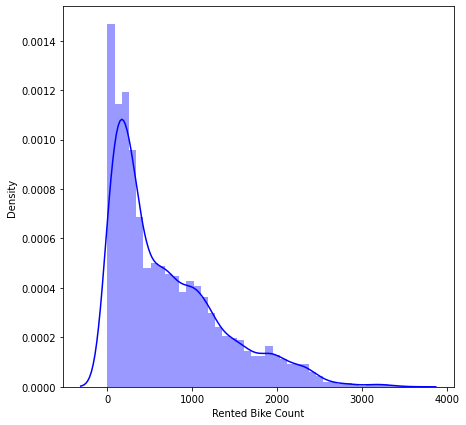

In [11]:
# Dependent variable 'Rented Bike Count	'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="b")
